# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [2]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [4]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [5]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

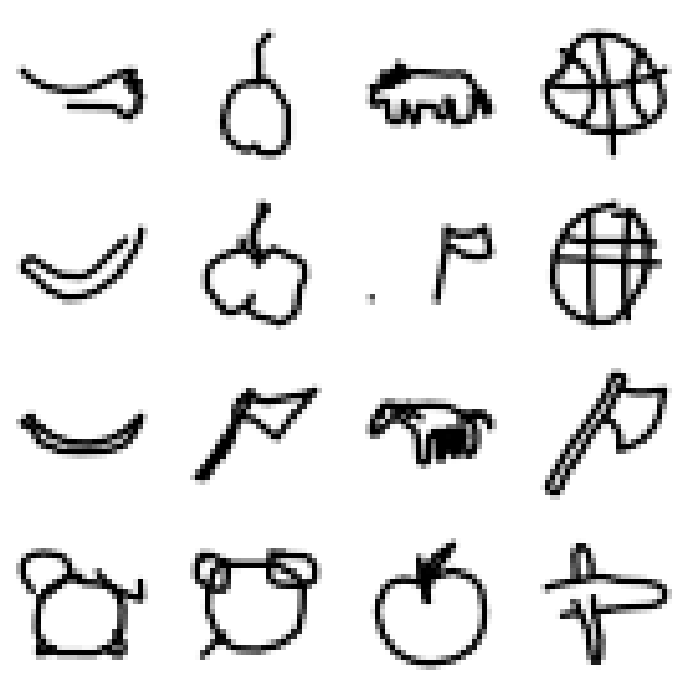

In [6]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [7]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [8]:
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1])) # 1st hiddern layer without resize_images

# resized_data_train = resize_images(data_train,(28,28))
# resized_data_test = resize_images(data_test,(28,28))
# model.add(Dense(256, activation='relu', input_dim=resized_data_train.shape[1])) # 1st hiddern layer with resize_images

# model.add(Dense(256, activation='relu')) # 2nd hiddern layer
# model.add(Dense(256, activation='relu')) # 3rd hiddern layer
# model.add(Dense(256, activation='relu')) # 4th hiddern layer
# model.add(Dense(256, activation='relu')) # 5th hiddern layer
model.add(Dense(10, activation='softmax')) # output layer
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(data_train, label_train, epochs=500, batch_size=32)         #fitting model without resize_images
predict_test = model.predict_classes(data_test)         #test accuracy without resize_images
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]

# model.fit(resized_data_train, label_train, epochs=500, batch_size=32)      #fitting model with resize_images  
# model.predict_classes(resized_data_test)           #test accuracy with resize_images
# acc_test = np.where(label_test1 == predict_test)[0].shape[0]/resized_data_test.shape[0]

print('Testing accuracy {}'.format(acc_test))

Epoch 1/500
 99808/100000 [============================>.] - ETA: 0s - loss: 3.0010 - accuracy: 0.61100000/100000 [==============================] - 13s 134us/step - loss: 2.9978 - accuracy: 0.6168
Epoch 2/500
100000/100000 [==============================] - 11s 111us/step - loss: 1.3646 - accuracy: 0.6984
Epoch 3/500
100000/100000 [==============================] - 11s 114us/step - loss: 1.3517 - accuracy: 0.7086
Epoch 4/500
100000/100000 [==============================] - 15s 146us/step - loss: 1.3530 - accuracy: 0.7152
Epoch 5/500
100000/100000 [==============================] - 27s 267us/step - loss: 1.3531 - accuracy: 0.7192
Epoch 6/500
100000/100000 [==============================] - 30s 296us/step - loss: 1.3404 - accuracy: 0.7256
Epoch 7/500
100000/100000 [==============================] - 19s 189us/step - loss: 1.3274 - accuracy: 0.7281
Epoch 8/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.3113 - accuracy: 0.7352
Epoch 9/500
100000/100000 [=======

In [9]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')

In [10]:

duration = time.time() - start_time
print('Time elapsed - {} seconds.'.format(duration))

Time elapsed - 4094.40198802948 seconds.
